<center><h1>Trabajo Fin de Estudios</header1></center>
<left><h1>Análisis catálogo de datos</header1></left>

### **Grupo de Trabajo** <br>
*   Daniel Emilio Caballero Bernal
*   Luis Felipe González Hernández

In [1]:
#importar librerias
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, f1_score, matthews_corrcoef
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree

In [2]:
#librerias para red neuronal
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU  # Importar la clase LeakyReLU

## Cargar el Dataset

## Caracterización del Dataset

Descripción de los datos:

In [4]:
#Código para cargar el Dataset datos Modelo
# Ruta al archivo Excel
url_xls = 'Datos/Datos_Modelo.xlsx'
datos = pd.read_excel(url_xls, sheet_name=0, engine='openpyxl', index_col=False)


In [5]:
#Código para la descripción del dataset Flujos irregulares
# Verificar el tamaño del dataset
print(f'Número de instancias: {datos.shape[0]}')

print("---Dimensionalidad del DataFrame---")
print(datos.shape)

print("---Resumen Estadistico de los Datos---")
print(datos.describe())

print("\n ---Descripción columnas del DataFrame---")
datos.info()

Número de instancias: 349615
---Dimensionalidad del DataFrame---
(349615, 17)
---Resumen Estadistico de los Datos---
                 AÑO            MES            DIA  Edad Simple Entrada
count  349615.000000  349615.000000  349615.000000        349613.000000
mean     2023.593902       5.567293      17.842635            34.650268
std         0.491104       2.695140       8.955573            17.462991
min      2023.000000       1.000000       1.000000             0.000000
25%      2023.000000       4.000000      10.000000            24.000000
50%      2024.000000       6.000000      19.000000            33.000000
75%      2024.000000       6.000000      26.000000            45.000000
max      2024.000000      12.000000      31.000000           123.000000

 ---Descripción columnas del DataFrame---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349615 entries, 0 to 349614
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                

In [6]:
# Hay algún valor faltante en las columnas
datos.isnull().any()


,0
TIPO_VISA,False
PAIS_PROCEDENCIA,False
PCM_NOMBRE_ENTRADA,False
TIPO DE FLUJO,False
VIAC_SEXO,False
TIPO_DOCUMENTO,False
DEPARTAMENTO_HOSPEDAJE,True
CIUDAD_HOSPEDAJE,True
NACIONALIDAD,False
AÑO,False


TIPO_VISA
PT       236459
POA       33539
PPT       23676
M         17158
RE        17105
V          7249
PID        5721
RC         4581
RS         1334
PD         1142
PS          845
PEP         375
PO          253
999         105
R            31
RI           13
PIP-5         7
TP-10         5
SIN           4
RN            3
TS            2
ATF           2
TP-4          2
TP-3          1
TP-7          1
NE            1
TC            1
Name: count, dtype: int64


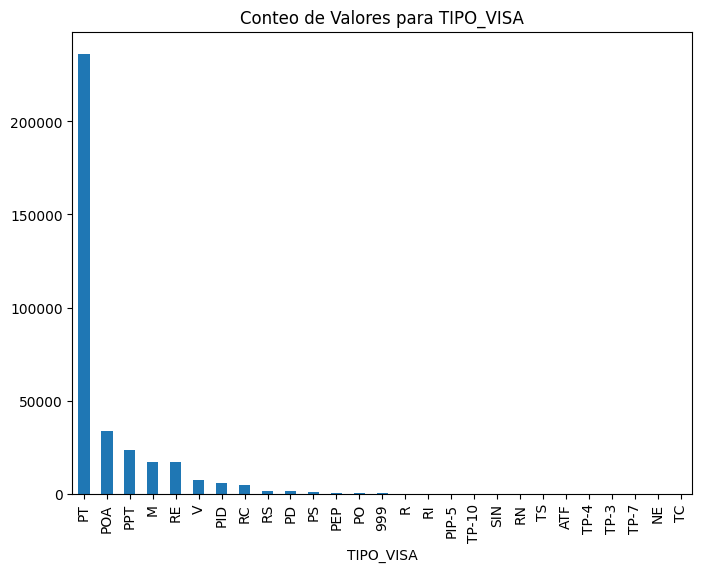

PAIS_PROCEDENCIA
VENEZUELA              71746
ESTADOS UNIDOS         65176
ECUADOR                50821
PANAMA                 23711
MEXICO                 18443
                       ...  
MAYOTTE                    1
GABON                      1
ARY MACEDONIA              1
CIUDAD DEL VATICANO        1
REPUBLICA DEL CONGO        1
Name: count, Length: 167, dtype: int64


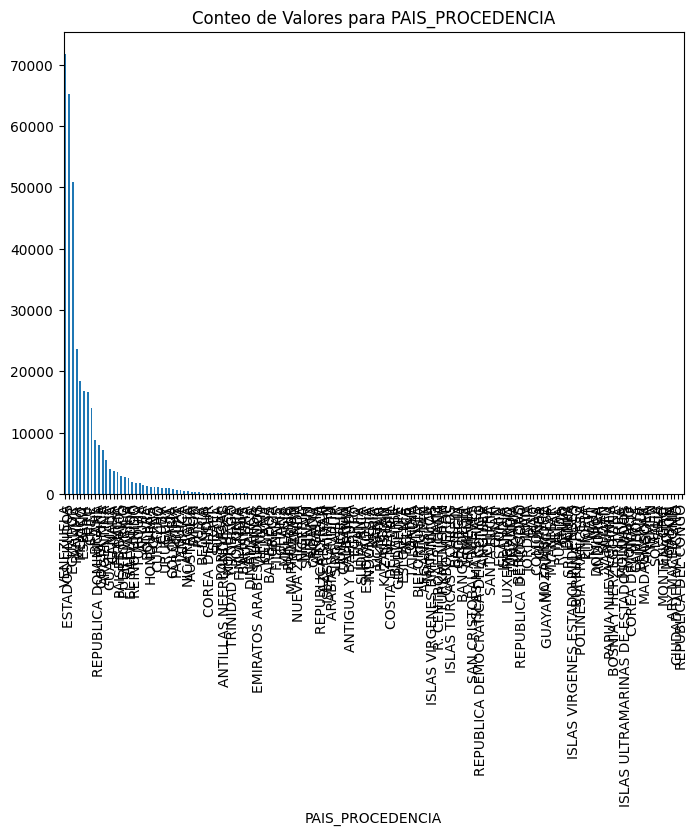

PCM_NOMBRE_ENTRADA
AEROPUERTO EL DORADO                                            133688
AEROPUERTO JOSE MARIA CORDOVA MEDELLIN                           44252
PUESTO MIGRATORIO DE RUMICHACA - IPIALES                         34646
PUESTO MIGRATORIO DE CUCUTA                                      27075
AEROPUERTO RAFEL NUÑEZ DE CARTAGENA                              18988
PTO. MARITIMO BUENAVENTURA                                       12881
PUESTO MIGRATORIO DE PARAGUACHON                                 12739
AEROPUERTO ALFONSO BONILLA ARAGON DE CALI                        11232
PUESTO DE CONTROL MIGRA TERRESTRE - PUENTE DE LA UNIDAD CUC      11151
PUERTO TERRESTRE DE SAN MIGUEL                                    6862
MUELLE INTERNACIONAL DE CARTAGENA                                 5706
PUNTO DE CONTROL TERRESTRE  FRANCISCO DE PAULA SANTANDER          5690
AEROPUERTO ERNESTO CORTIZO DE BARRANQUILLA                        4387
PUESTO DE CONTOL TERRESTRE PUERTO SANTANDER NORTE DE SANTA

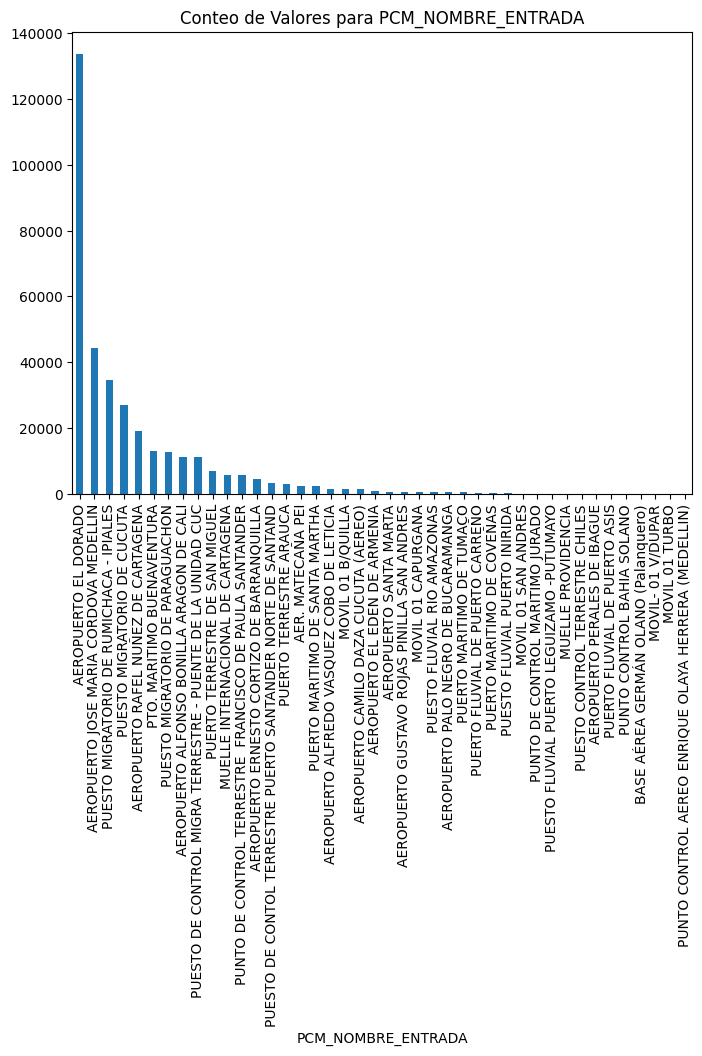

TIPO DE FLUJO
I    349615
Name: count, dtype: int64


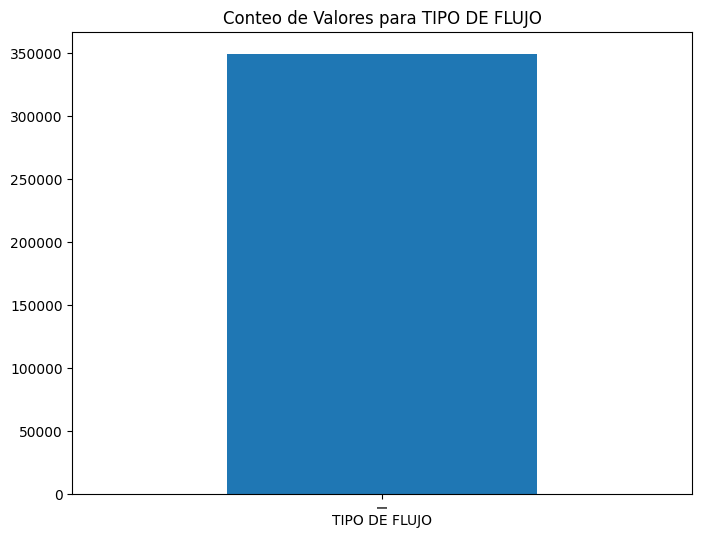

VIAC_SEXO
M    200847
F    148416
I       351
S         1
Name: count, dtype: int64


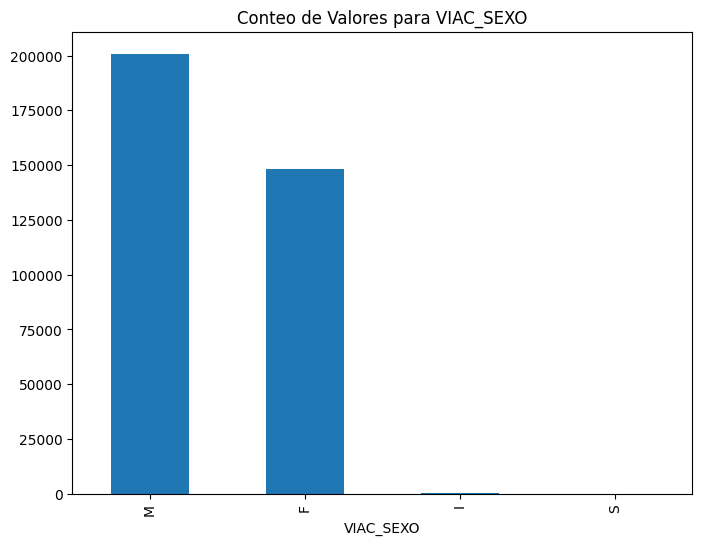

TIPO_DOCUMENTO
PASAPORTE                                  302322
DOCUMENTO EXTRANJERO                        41402
PERMISO POR PROTECCION TEMPORAL              2764
PASAPORTE DIPLOMATICO                         823
PASAPORTE OFICIAL                             656
PASAPORTE EMERGENCIA                          588
CÉDULA DE EXTRANJERÍA                         406
PASAPORTE DE SERVICIO                         292
DOCUMENTO DE VIAJE                            240
PASAPORTE ORDINARIO                            44
PERMISO ESPECIAL DE PERMANENCIA                38
CEDULA DE CIUDADANIA                           28
REGISTRO CIVIL                                  5
TARJETA DE IDENTIDAD                            3
CERTIFICADO DE EXPEDICION DEL RUMV              1
TARJETA DE MOVILIDAD FRONTERIZA                 1
PASAPORTE EXENTO                                1
REGISTRO ADMON DE MIGRANTES VENE EN COL         1
Name: count, dtype: int64


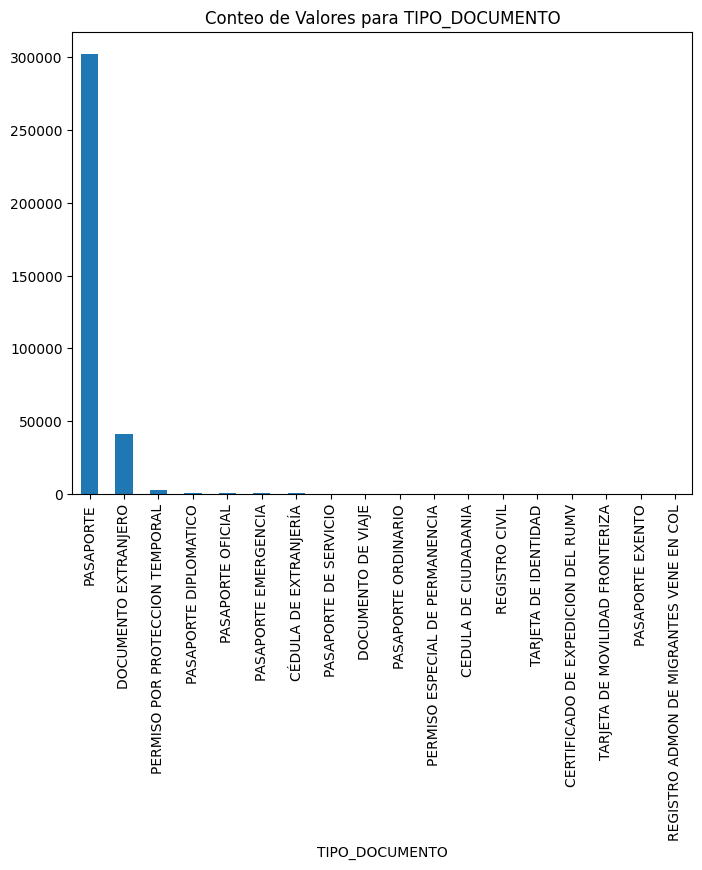

DEPARTAMENTO_HOSPEDAJE
BOGOTÁ, D.C.                                                119850
ANTIOQUIA                                                    72073
VALLE DEL CAUCA                                              48139
BOLÍVAR                                                      32491
NORTE DE SANTANDER                                           14677
ATLÁNTICO                                                    10400
MAGDALENA                                                     6191
RISARALDA                                                     6103
SANTANDER                                                     5925
CUNDINAMARCA                                                  5198
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA      3288
NARIÑO                                                        3286
QUINDIO                                                       3068
META                                                          2288
CALDAS                                 

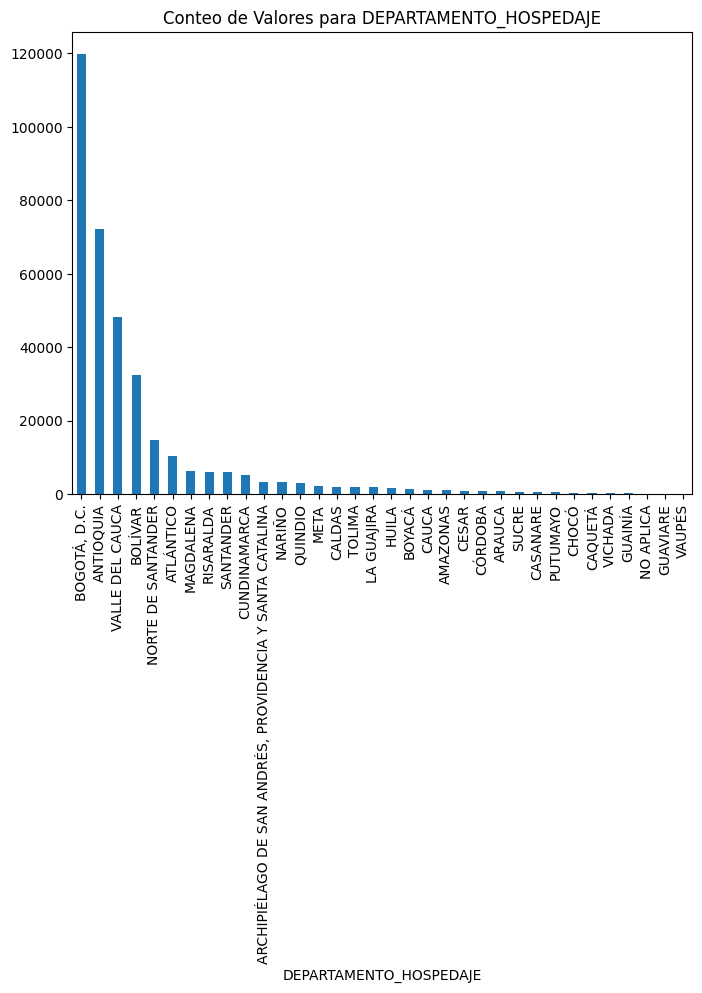

CIUDAD_HOSPEDAJE
BOGOTÁ, D.C.      119850
MEDELLÍN           61559
CARTAGENA          32179
CALI               30441
BUENAVENTURA       13108
                   ...  
CERRITO                1
GAMEZA                 1
BARRANCO MINAS         1
CUNDAY                 1
MOGOTES                1
Name: count, Length: 848, dtype: int64


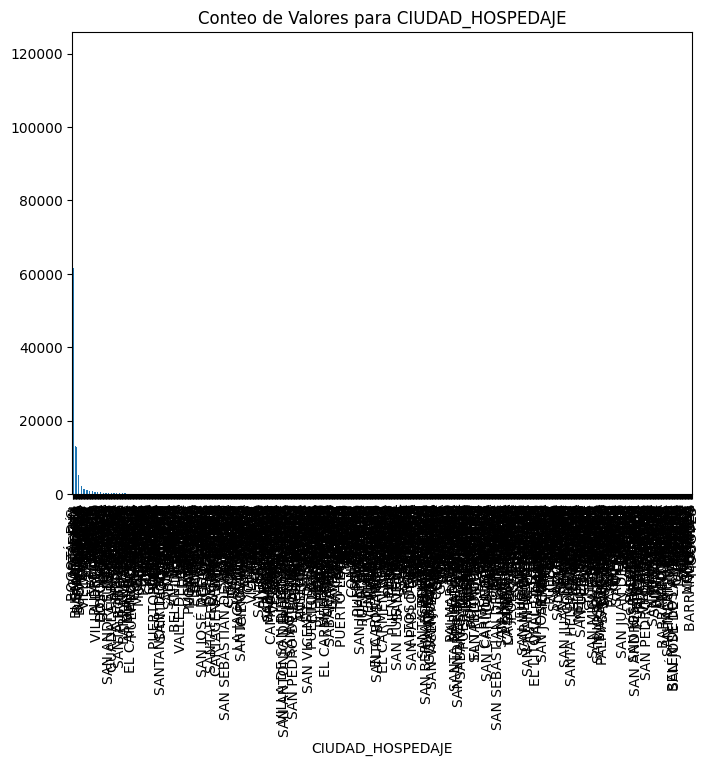

NACIONALIDAD
VENEZUELA              95345
ESTADOS UNIDOS         59404
ECUADOR                44536
MEXICO                 14364
PERU                   10602
                       ...  
LESOTO                     1
REPUBLICA DEL CONGO        1
GUADALUPE                  1
SAMOA AMERICANA            1
TIMOR ORIENTAL             1
Name: count, Length: 183, dtype: int64


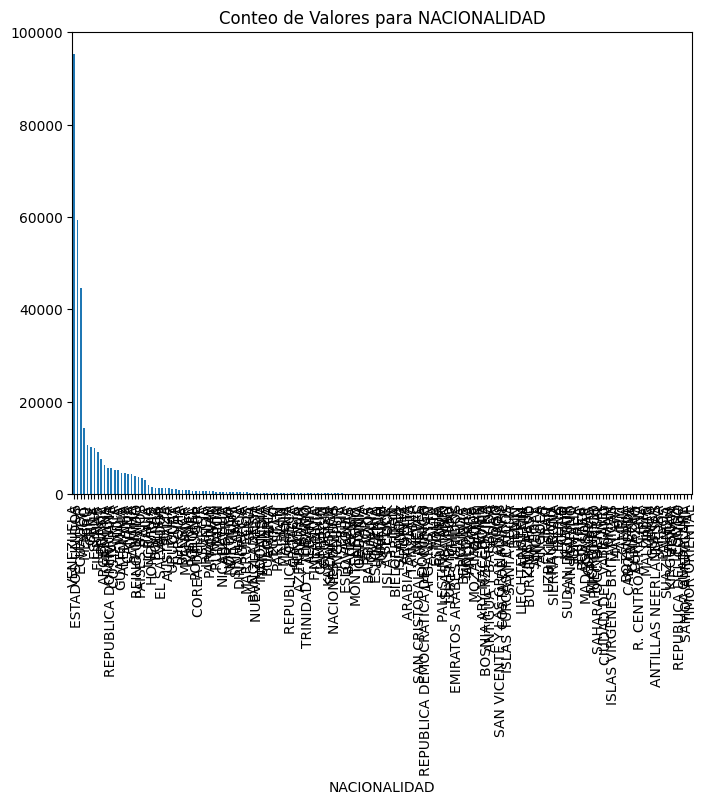

Nacionalidad_Uraba
Ecuador                     5188
Venezuela                   1288
Ghana                         73
Haití                         62
Perú                          51
República Dominicana          47
Marruecos                     41
Pakistán                      38
Camerún                       33
Kazajistán                    19
Bangladés                     16
Albania                       15
China                         14
Azerbaiyán                    13
Chile                         11
Vietnam                       11
Afganistán                    11
Brasil                         9
Nigeria                        9
Bolivia                        8
Kenia                          8
Malí                           8
Egipto                         7
India                          6
Arabia Saudita                 4
Nepal                          4
Iraq                           3
Irán                           3
Angola                         3
Turquía                 

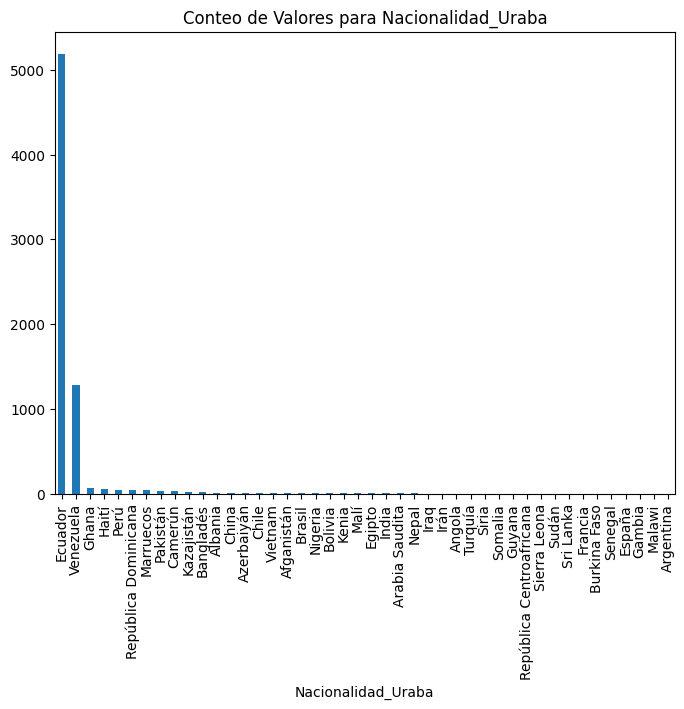

Sexo Uraba
M    4340
F    2684
Name: count, dtype: int64


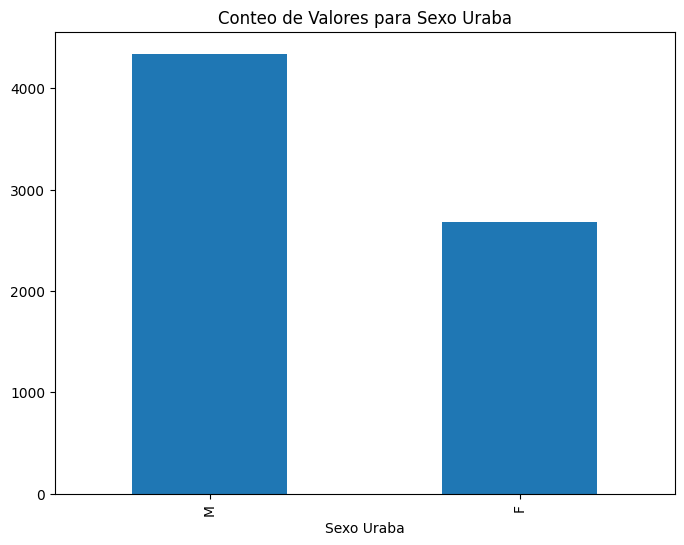

MOTIVO DE VIAJE
DESCANSO Y ESPARCIMIENTO                                                 228222
RESIDENTE                                                                 23662
SHORE PASS                                                                21659
TRÁNSITO:CONEXIONES,ESCALAS,RETORNO O DESPLAZAMIENTO A UN TERCER PAÍS     10031
BENEFICIARIO DE VISA RE, DURANTE 5 AÑOS                                    7985
                                                                          ...  
CONFERENCISTA                                                                 1
TRAMITES ADMINISTRATIVOS/NOTARIALES                                           1
TRABAJO                                                                       1
LEY DE CINE                                                                   1
EXTRADITADO                                                                   1
Name: count, Length: 129, dtype: int64


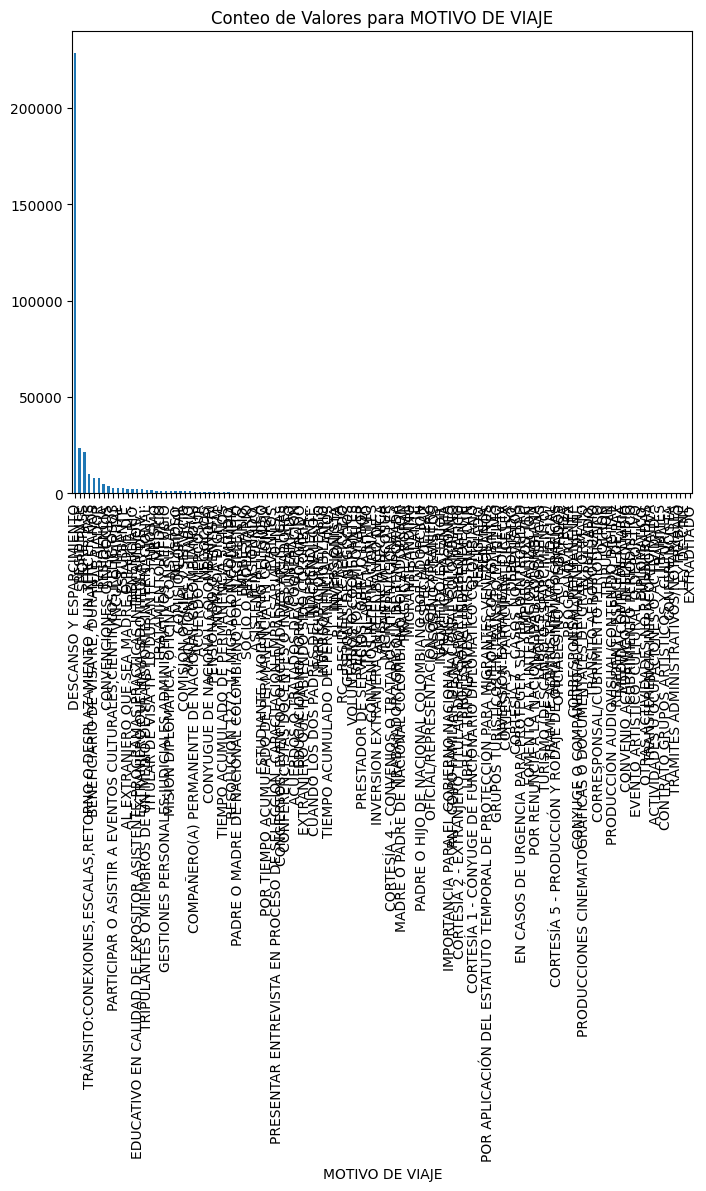

MEDIO DE TRANSPORTE
AEREO                                                   219097
TERRESTRE                                               104451
MARITIMO                                                 18587
PUERTO MARITIMO DE SANTA MARTHA                           2302
MOVIL 01 B/QUILLA                                         1481
FLUVIAL                                                    949
AEROPUERTO EL EDEN DE ARMENIA                              930
AEROPUERTO GUSTAVO ROJAS PINILLA SAN ANDRES                536
MOVIL 01 CAPURGANA                                         534
PUERTO MARITIMO DE TUMACO                                  430
PUERTO MARITIMO DE COVEÑAS                                 246
MOVIL 01 SAN ANDRES                                         32
PUNTO DE CONTROL MARITIMO JURADO                            10
PUESTO FLUVIAL PUERTO LEGUIZAMO -PUTUMAYO                    8
MUELLE PROVIDENCIA                                           7
PUESTO CONTROL TERRESTRE CHILES    

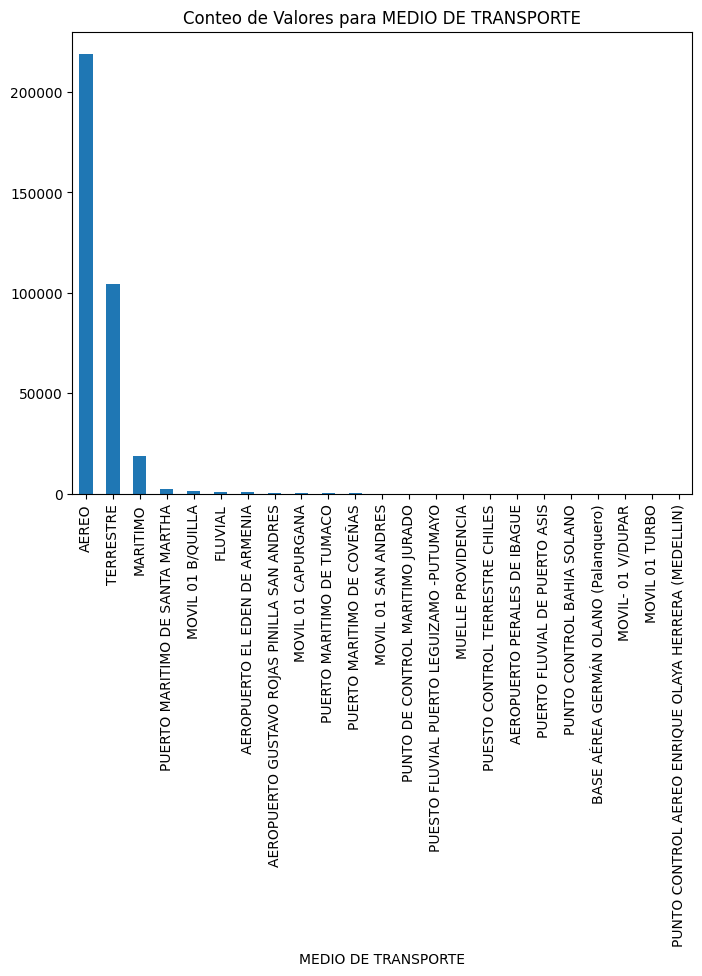

In [7]:
# Conteo de valores para cada variable categórica del dataset flujos irregulares
columnas_categoricas = datos.select_dtypes(include=['object']).columns

for col in columnas_categoricas:
    print(datos[col].value_counts())
    datos[col].value_counts().plot(kind='bar', figsize=(8,6))
    plt.title(f'Conteo de Valores para {col}')
    plt.show()

In [8]:
# Recuento de valores faltantes de todo el marco de datos
datos.isnull().sum()

,0
TIPO_VISA,0
PAIS_PROCEDENCIA,0
PCM_NOMBRE_ENTRADA,0
TIPO DE FLUJO,0
VIAC_SEXO,0
TIPO_DOCUMENTO,0
DEPARTAMENTO_HOSPEDAJE,941
CIUDAD_HOSPEDAJE,941
NACIONALIDAD,0
AÑO,0


# Transformaciones
En Esta sección realizamos las transformaciones necesarias para el entrenamiento del modelo, tomando como base los datos suministrados por Migración Colombia.

In [ ]:
# Crear una nueva columna donde 0 indica que no hay valor y 1 que hay valor
datos['clase'] = datos['Nacionalidad_Uraba'].apply(lambda x: 0 if not x or pd.isna(x) else 1)

In [ ]:
# Eliminar las columnas Nacionalidad_Uraba y Sexo_Uraba
datos = datos.drop(columns=['Nacionalidad_Uraba', 'Sexo Uraba'])


In [ ]:
# Eliminar filas donde 'Edad Simple Entrada' es nula
datos = datos.dropna(subset=['Edad Simple Entrada'])

In [ ]:
# Reemplazar valores nulos por "No Disponible" en las columnas específicas
datos['DEPARTAMENTO_HOSPEDAJE'] = datos['DEPARTAMENTO_HOSPEDAJE'].fillna('No Registra')
datos['CIUDAD_HOSPEDAJE'] = datos['CIUDAD_HOSPEDAJE'].fillna('No Registra')

# Verificar que los valores nulos fueron reemplazados
print(datos[['DEPARTAMENTO_HOSPEDAJE', 'CIUDAD_HOSPEDAJE']].isnull().sum())

DEPARTAMENTO_HOSPEDAJE    0
CIUDAD_HOSPEDAJE          0
dtype: int64


## Realizamos recodificacion de variables categoricas

In [ ]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

# en esta linea se identifican las características categóricas
categorical_features = datos.select_dtypes(include='object')


# Se crea un objeto LabelEncoder
label_encoder = LabelEncoder()

# Se Codifica cada característica categórica
for col in categorical_features:
    datos[col] = label_encoder.fit_transform(datos[col])

In [ ]:
datos.head()

,TIPO_VISA,PAIS_PROCEDENCIA,PCM_NOMBRE_ENTRADA,TIPO DE FLUJO,VIAC_SEXO,TIPO_DOCUMENTO,DEPARTAMENTO_HOSPEDAJE,CIUDAD_HOSPEDAJE,NACIONALIDAD,AÑO,MES,DIA,Edad Simple Entrada,MOTIVO DE VIAJE,MEDIO DE TRANSPORTE,clase
0,26,74,4,0,2,5,5,86,72,2024,5,9,28.0,70,0,0
1,26,137,4,0,2,5,6,132,87,2024,4,29,48.0,70,0,0
2,26,38,4,0,2,5,5,86,39,2023,6,15,53.0,70,0,0
3,26,60,11,0,0,5,4,74,59,2023,12,31,27.0,70,0,0
4,26,125,4,0,2,5,5,86,39,2024,6,28,30.0,70,0,0


In [ ]:
print("---Distribución por clases---")
print(datos.groupby('clase').size())

---Distribución por clases---
clase
0    342589
1      7024
dtype: int64


## División del dataset en datos de entrenamiento y datos de test

In [ ]:
# Dividir los datos en características (X) y la variable objetivo (y)
X = datos.drop(columns=['clase'])
y = datos['clase']

# Submuestrear los datos para equilibrar las clases (7024 de cada clase)
n_instancias=7024
rus = RandomUnderSampler(sampling_strategy={0: n_instancias, 1: n_instancias}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Verificar la distribución balanceada de clases
print(pd.Series(y_resampled).value_counts())  # Debe mostrar 7024 para ambas clases

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42)

# Escalar los datos (normalización)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar los datos de entrenamiento
X_test = scaler.transform(X_test)        # Transformar los datos de prueba

clase
0    7024
1    7024
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
# Diccionario para almacenar los resultados
model_scores = {}

# Entrenamiento de Modelos

## Modelos de Clasificación

### Regresión Logística

In [ ]:
logistic_model = LogisticRegression(
    max_iter=100,         # Aumentar iteraciones para convergencia
    class_weight='balanced',  # Manejo de clases desbalanceadas
    random_state=42       # Para reproducibilidad
    )
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Almacenar precisión y evaluación
model_scores['Regresión Logística'] = accuracy_score(y_test, y_pred_logistic)
print("Regresión Logística")
print(classification_report(y_test, y_pred_logistic))

Regresión Logística
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1439
           1       0.83      0.90      0.86      1371

    accuracy                           0.86      2810
   macro avg       0.86      0.86      0.86      2810
weighted avg       0.86      0.86      0.86      2810



### Arbol de Decisión

In [ ]:
# ÁRBOL DE DECISIÓN
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    class_weight='balanced',   # Manejo de clases desbalanceadas
    random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Almacenar precisión del Árbol de Decisión
model_scores['Árbol de Decisión'] = accuracy_score(y_test, y_pred_dt)
print("Árbol de Decisión")
print(classification_report(y_test, y_pred_dt))

Árbol de Decisión
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1439
           1       0.88      0.91      0.90      1371

    accuracy                           0.90      2810
   macro avg       0.90      0.90      0.90      2810
weighted avg       0.90      0.90      0.90      2810



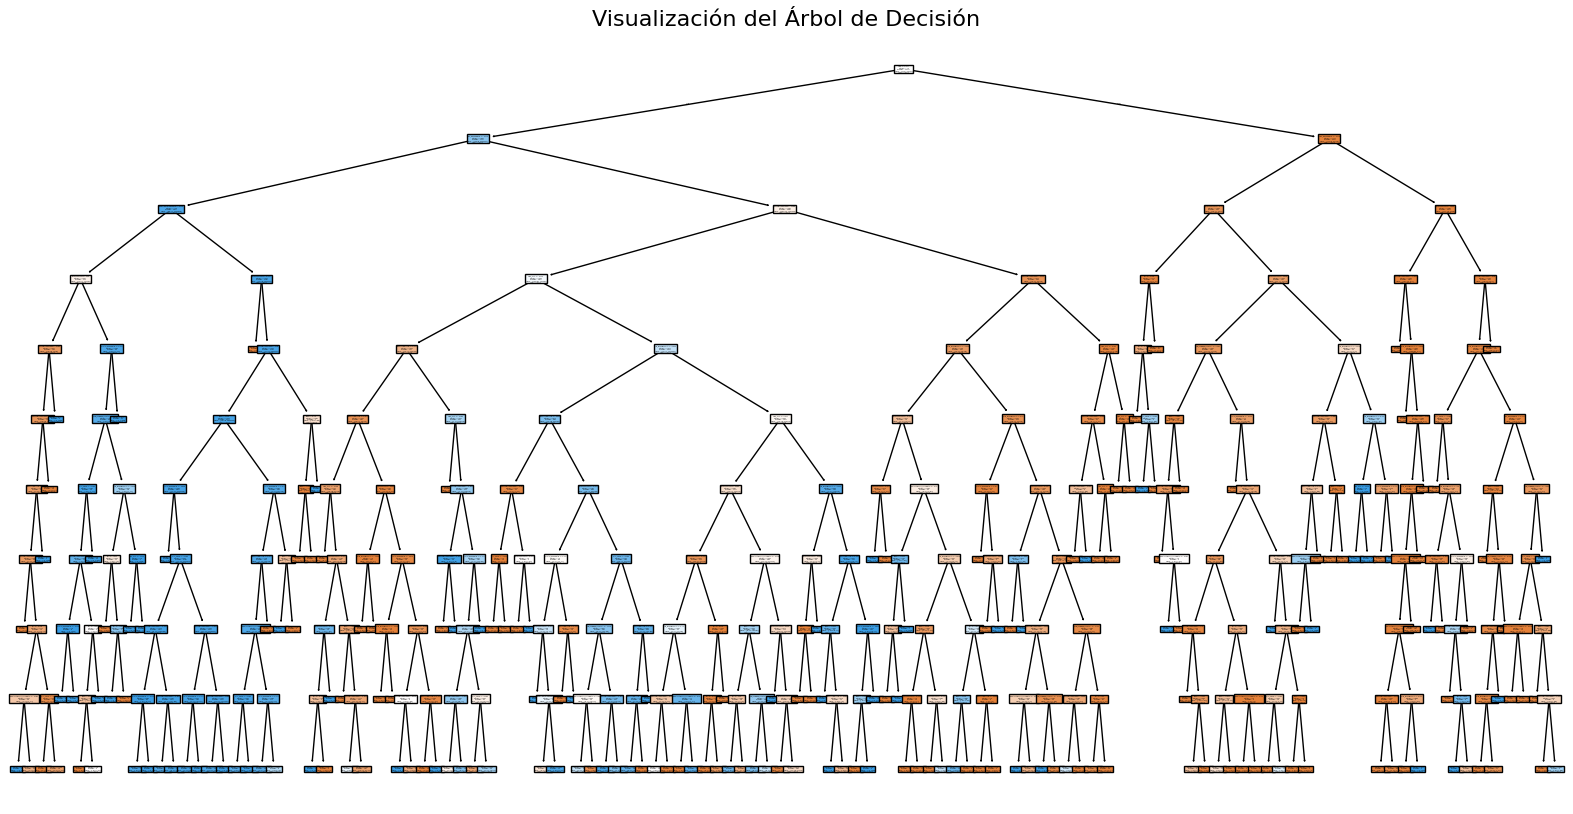

In [ ]:
# Graficar el Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Clase 0", "Clase 1"], filled=True)
plt.title("Visualización del Árbol de Decisión", fontsize=16)
plt.show()

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42) #criterion='gini' o 'entropy' ganancia de información
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

model_scores['Random Forest'] = accuracy_score(y_test, y_pred_rf)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1439
           1       0.88      0.93      0.90      1371

    accuracy                           0.90      2810
   macro avg       0.90      0.90      0.90      2810
weighted avg       0.90      0.90      0.90      2810



### Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,          # Incrementar número de árboles
    learning_rate=0.05,        # Reducir tasa de aprendizaje
    max_depth=5,               # Incrementar profundidad de los árboles
    min_samples_split=5,       # Mayor mínimo de muestras para división
    min_samples_leaf=2,        # Mayor mínimo de muestras en hojas
    subsample=0.8,             # Usar una fracción de los datos
    random_state=42            # Reproducibilidad
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

model_scores['Gradient Boosting'] = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1439
           1       0.89      0.93      0.91      1371

    accuracy                           0.91      2810
   macro avg       0.91      0.91      0.91      2810
weighted avg       0.91      0.91      0.91      2810



## Redes Neuronales

In [ ]:
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Cantidad de neuronas capa de entrada = al numero de caracteristicas
    Dense(64),
    LeakyReLU(negative_slope=0.01),  # Capa LeakyReLU con `negative_slope`
    Dropout(0.3), # Esto desactivará aleatoriamente un porcentaje de neuronas durante el entrenamiento
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
EPOCHS = 30
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, verbose=1)

# Realizar predicciones y convertirlas a clases
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
model_scores['Redes Neuronales'] = accuracy_score(y_test, y_pred_nn)

print("Redes Neuronales")
print(classification_report(y_test, y_pred_nn))

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8155 - loss: 0.4190
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8781 - loss: 0.3048
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8863 - loss: 0.2819
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8900 - loss: 0.2851
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8827 - loss: 0.2822
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8862 - loss: 0.2843
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8933 - loss: 0.2668
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8892 - loss: 0.2868
Epoch 9/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9001 - loss: 0.2660
Epoch 10/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8979 - loss: 0.2618
Epoch 11/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9006 - loss: 0.2630
Epoch 12/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
nn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,893 (85.52 KB)

 Trainable params: 7,297 (28.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,596 (57.02 KB)

# Comparar Resultados con Gráficas

## Bar Chart de Precisión

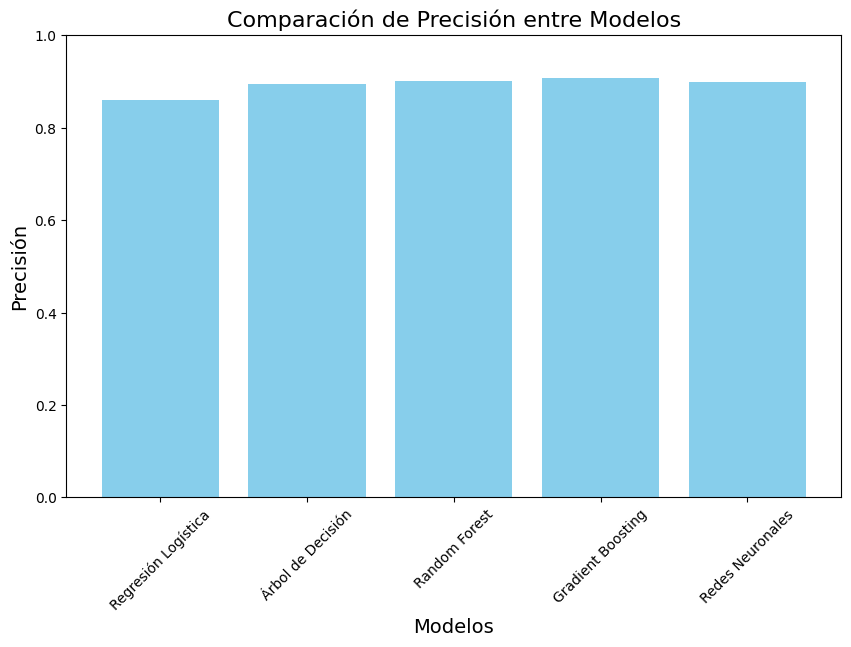

In [ ]:
# Crear una gráfica de barras para comparar las precisiones
plt.figure(figsize=(10, 6))
plt.bar(model_scores.keys(), model_scores.values(), color='skyblue')
plt.title('Comparación de Precisión entre Modelos', fontsize=16)
plt.ylabel('Precisión', fontsize=14)
plt.xlabel('Modelos', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Precisión va de 0 a 1
plt.show()

##Curvas ROC

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


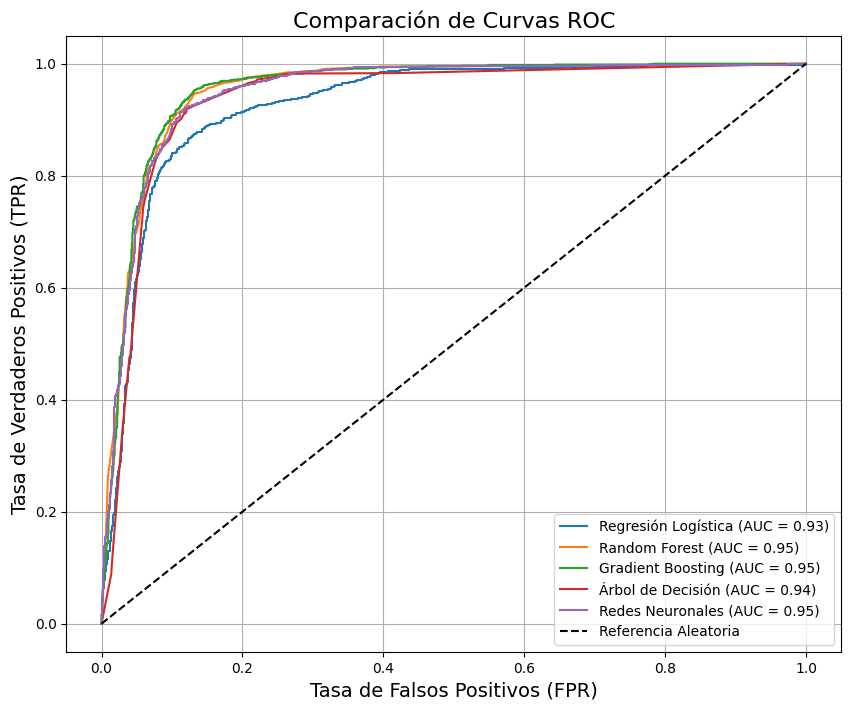

In [ ]:
# COMPARACIÓN: CURVAS ROC
plt.figure(figsize=(10, 8))
models = {
    "Regresión Logística": logistic_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Árbol de Decisión": dt_model,
    "Redes Neuronales": nn_model
}

for model_name, model in models.items():
    # Calcular probabilidades para ROC (excepto Árbol de Decisión, que no tiene método `predict_proba`)
    if model_name == "Redes Neuronales":
        y_proba = nn_model.predict(X_test).ravel()
    else:
        y_proba = model.predict_proba(X_test)[:, 1]

    # Calcular curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Línea de referencia (clasificación aleatoria)
plt.plot([0, 1], [0, 1], 'k--', label='Referencia Aleatoria')

plt.title("Comparación de Curvas ROC", fontsize=16)
plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=14)
plt.ylabel("Tasa de Verdaderos Positivos (TPR)", fontsize=14)
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Gráficas, Matriz de Confusión y Resumen de Métricas

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


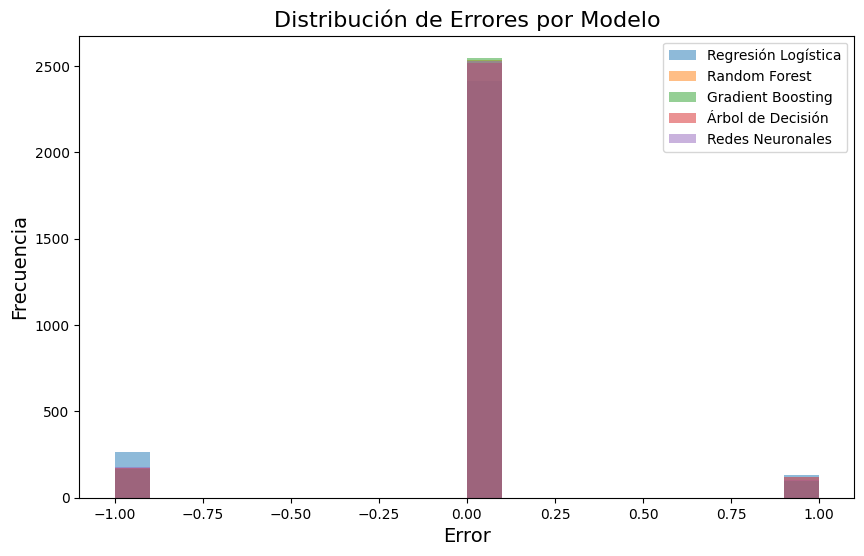

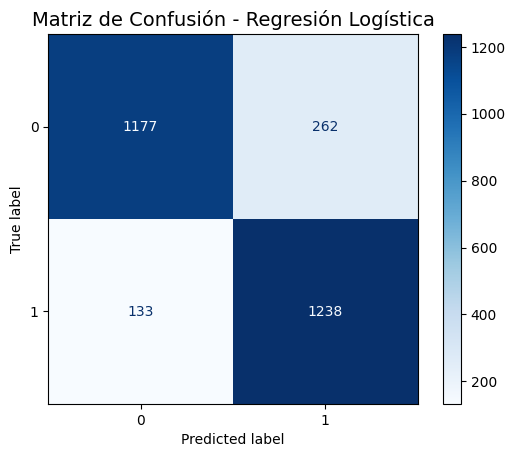

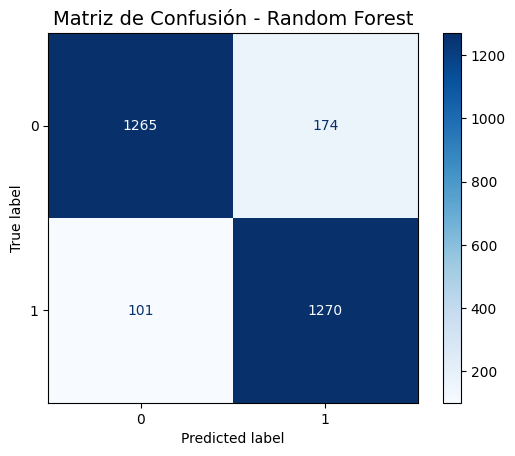

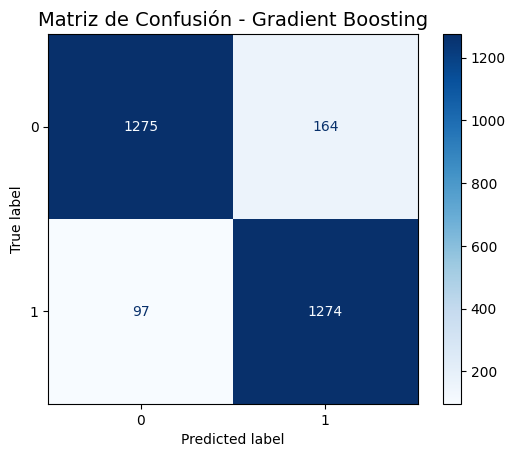

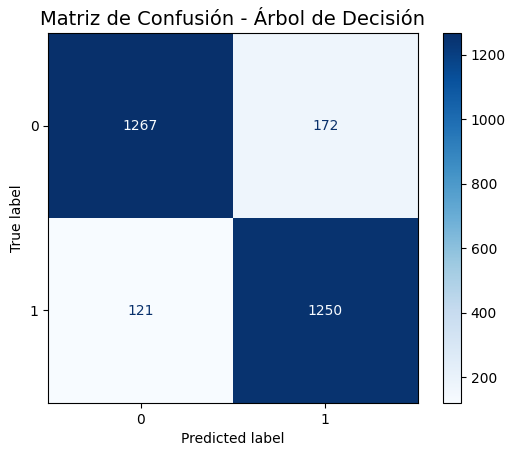

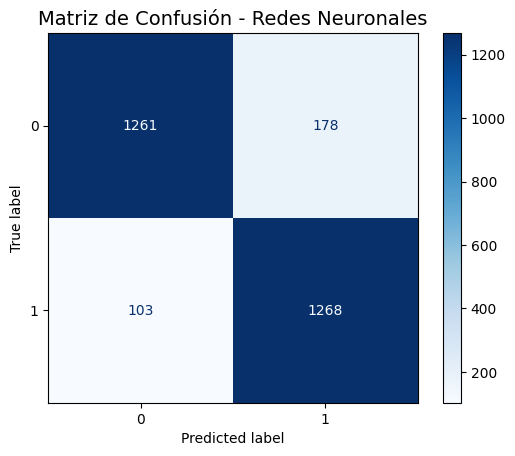

In [ ]:
# HISTOGRAMA DE DISTRIBUCIÓN DE LOS ERRORES
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    if model_name == "Redes Neuronales":
        y_pred = (nn_model.predict(X_test) > 0.5).astype(int).ravel()
    else:
        y_pred = model.predict(X_test)

    # Calcular errores
    errores = y_test - y_pred
    plt.hist(errores, bins=20, alpha=0.5, label=f"{model_name}")

plt.title("Distribución de Errores por Modelo", fontsize=16)
plt.xlabel("Error", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.legend(loc="upper right")
plt.show()

# MATRICES DE CONFUSIÓN (Incluir Árbol de Decisión)
models_with_predictions = {
    "Regresión Logística": (logistic_model, y_pred_logistic),
    "Random Forest": (rf_model, y_pred_rf),
    "Gradient Boosting": (gb_model, y_pred_gb),
    "Árbol de Decisión": (dt_model, y_pred_dt),
    "Redes Neuronales": (nn_model, y_pred_nn)
}

for model_name, (model, y_pred) in models_with_predictions.items():
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title(f'Matriz de Confusión - {model_name}', fontsize=14)
    plt.show()

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                Modelo  Precisión    Recall  F1-Score   AUC-ROC
0  Regresión Logística   0.859431  0.902991  0.862417  0.927399
1        Random Forest   0.902135  0.926331  0.902309  0.952843
2    Gradient Boosting   0.907117  0.929249  0.907084  0.953718
3    Árbol de Decisión   0.895730  0.911743  0.895095  0.937443
4     Redes Neuronales   0.900000  0.924872  0.900248  0.949398


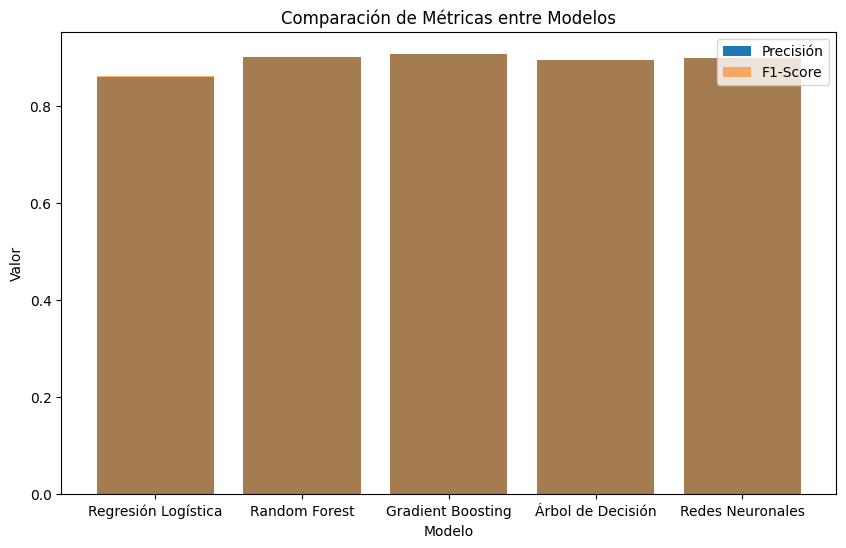

In [ ]:
# RESUMEN DE MÉTRICAS
results = []

for model_name, (model, y_pred) in models_with_predictions.items():
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # AUC-ROC
    if model_name == "Redes Neuronales":
        y_proba = nn_model.predict(X_test).ravel()
    else:
        y_proba = model.predict_proba(X_test)[:, 1]
    auc_roc = auc(*roc_curve(y_test, y_proba)[:2])

    results.append({
        "Modelo": model_name,
        "Precisión": accuracy_score(y_test, y_pred),
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc_roc
    })

# Crear el DataFrame de resultados
results_df = pd.DataFrame(results)

# Mostrar resultados
print(results_df)

# Visualizar resumen
plt.figure(figsize=(10, 6))
plt.bar(results_df['Modelo'], results_df['Precisión'], label='Precisión')
plt.bar(results_df['Modelo'], results_df['F1-Score'], alpha=0.6, label='F1-Score')
plt.title("Comparación de Métricas entre Modelos")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.legend()
plt.show()

## Gráficos de Resultados por Modelo


Modelo: Regresión Logística
Precision en Train: 0.8434, Test: 0.8253
Recall en Train: 0.9024, Test: 0.9030
F1-Score en Train: 0.8719, Test: 0.8624


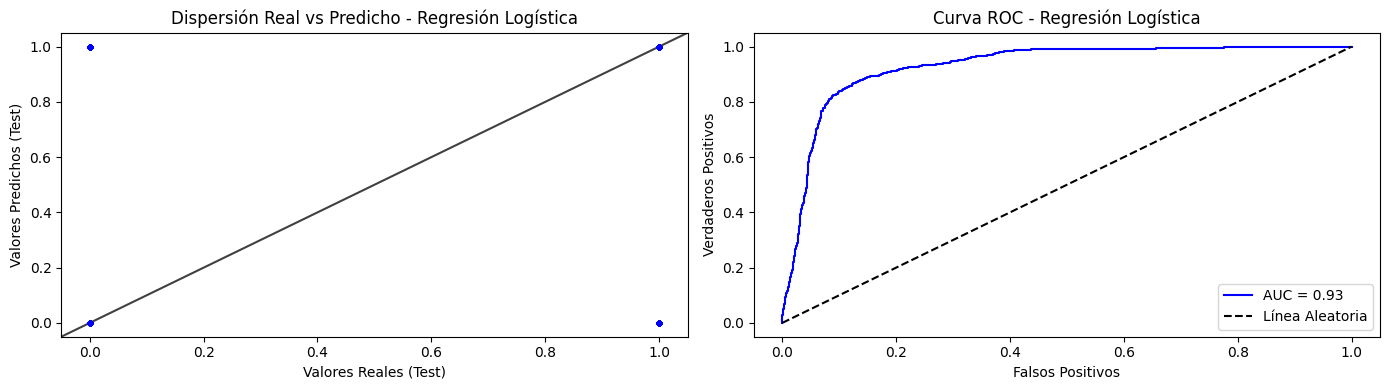


Modelo: Árbol de Decisión
Precision en Train: 0.9050, Test: 0.8790
Recall en Train: 0.9266, Test: 0.9117
F1-Score en Train: 0.9157, Test: 0.8951


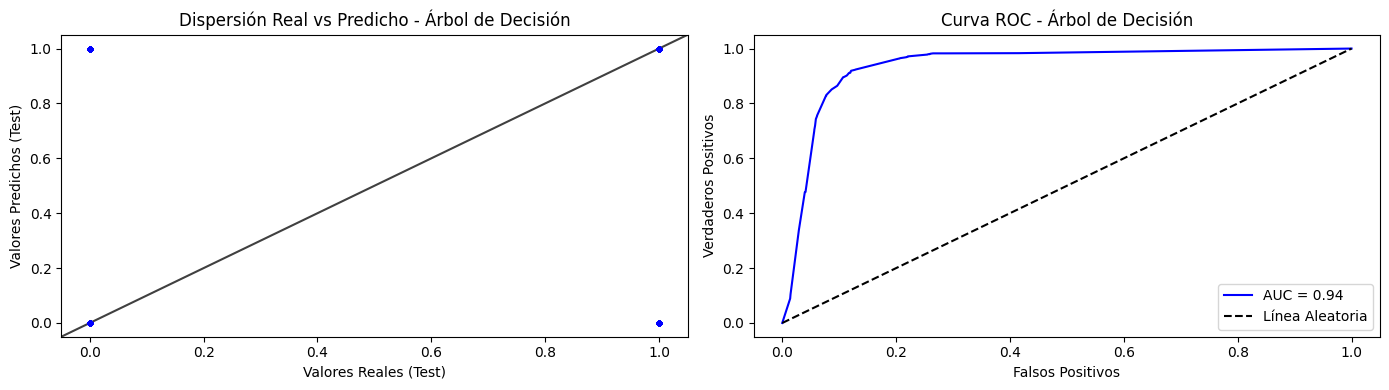


Modelo: Random Forest
Precision en Train: 0.9959, Test: 0.8795
Recall en Train: 0.9989, Test: 0.9263
F1-Score en Train: 0.9974, Test: 0.9023


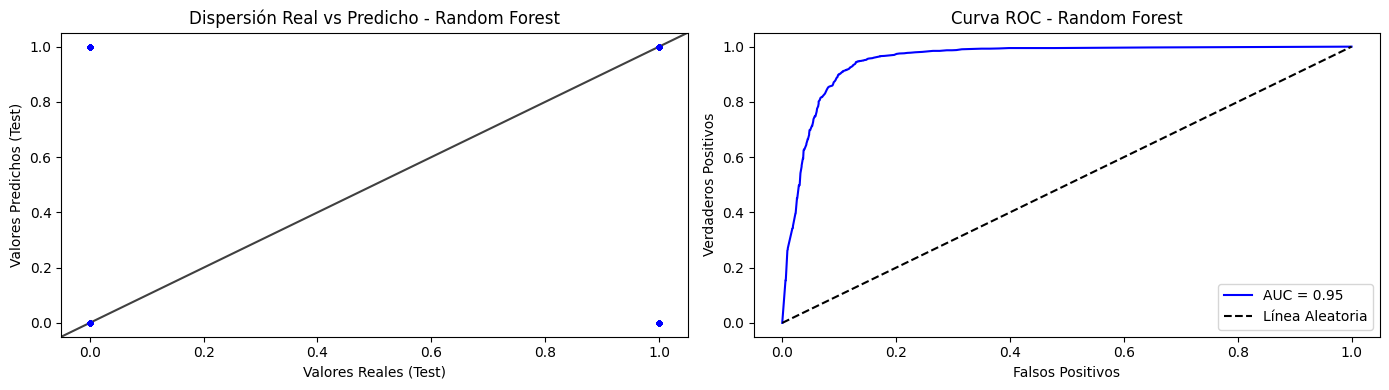


Modelo: Gradient Boosting
Precision en Train: 0.9171, Test: 0.8860
Recall en Train: 0.9529, Test: 0.9292
F1-Score en Train: 0.9347, Test: 0.9071


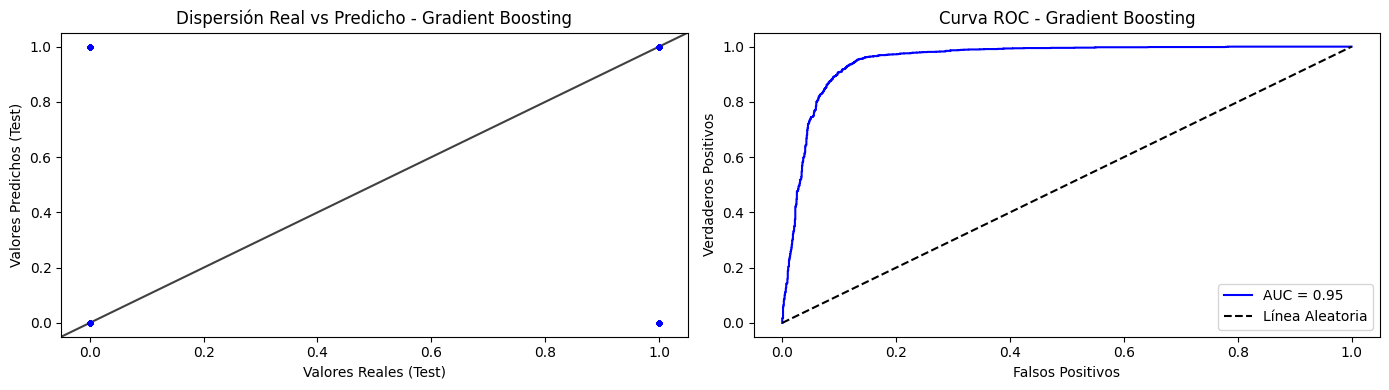

352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Modelo: Redes Neuronales
Precision en Train: 0.9040, Test: 0.8769
Recall en Train: 0.9245, Test: 0.9249
F1-Score en Train: 0.9141, Test: 0.9002
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


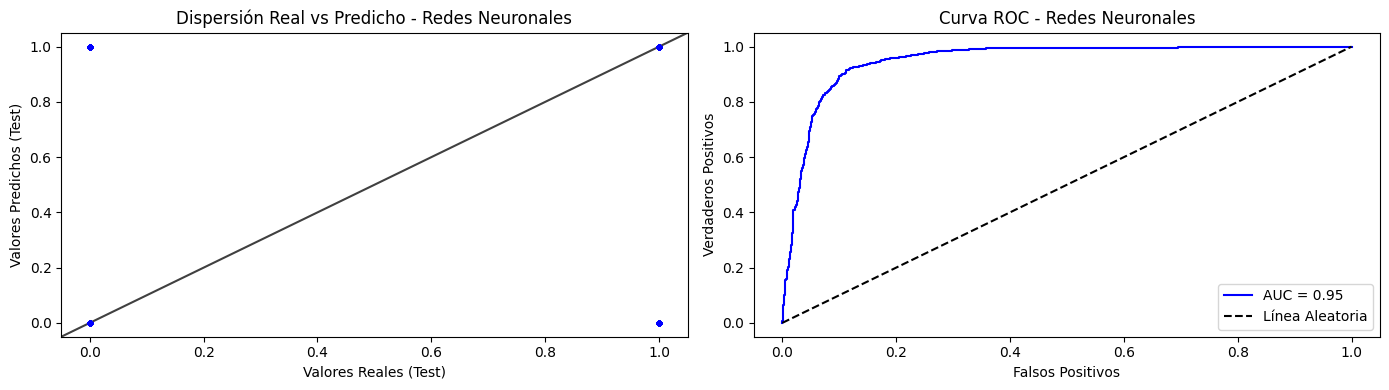

In [ ]:
# Definir los modelos y sus nombres
models = {
    "Regresión Logística": logistic_model,
    "Árbol de Decisión": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Redes Neuronales": nn_model
}

for model_name, model in models.items():
    # Predicciones
    if model_name == "Redes Neuronales":
        y_train_pred = (nn_model.predict(X_train) > 0.5).astype(int).ravel()
        y_test_pred = (nn_model.predict(X_test) > 0.5).astype(int).ravel()
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Cálculo de métricas
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    print(f"\nModelo: {model_name}")
    print(f"Precision en Train: {precision_train:.4f}, Test: {precision_test:.4f}")
    print(f"Recall en Train: {recall_train:.4f}, Test: {recall_test:.4f}")
    print(f"F1-Score en Train: {f1_train:.4f}, Test: {f1_test:.4f}")

    # Gráfico de dispersión: valores reales vs predichos (con ruido)
    plt.figure(figsize=(14, 4))
    ax = plt.subplot(1, 2, 1)
    ax.scatter(y_test, y_test_pred, s=10, alpha=0.7, color="blue")

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min de ambos ejes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max de ambos ejes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.xlabel("Valores Reales (Test)")
    plt.ylabel("Valores Predichos (Test)")
    plt.title(f"Dispersión Real vs Predicho - {model_name}")

    # Gráfico de curva ROC
    plt.subplot(1, 2, 2)
    if model_name == "Redes Neuronales":
        y_proba = nn_model.predict(X_test).ravel()
    else:
        y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
    plt.plot([0, 1], [0, 1], 'k--', label="Línea Aleatoria")
    plt.xlabel("Falsos Positivos")
    plt.ylabel("Verdaderos Positivos")
    plt.title(f"Curva ROC - {model_name}")
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()